# Applying Data Science technique on the loan_data.csv dataset

At first we import the required python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Using Pandas

Then we read the dataset using read_csv() method of Pandas. We store this in a dataframe.

In [2]:
data = pd.read_csv('loan_data.csv')

Checking the first 5 entries of the dataset

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


The last 5 entries

In [4]:
data.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


Dataset information, columns, datatypes, number of entries, memory usage, etc.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Statistical information on the Dataframe

In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Querying the dataset with Pandas

Dislaying first 5 entries where the fractional part of the 'dti' column is greater than 0.5

In [7]:
import math
data[data['dti'].apply(lambda x:math.modf(x)[0])>0.5].head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
14,1,debt_consolidation,0.0863,209.54,9.487972,9.73,727,1559.958333,6282,44.6,0,0,0,0
18,1,debt_consolidation,0.1039,584.12,10.491274,3.80,712,2760.000000,8311,59.8,0,0,0,0


Displaying first 5 entries where the 'installment' is greater than average

In [8]:
data[data['installment'] > data['installment'].mean()].head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
10,1,debt_consolidation,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0
15,1,major_purchase,0.1103,327.53,10.738915,13.04,702,8159.958333,5394,53.4,1,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0


## Using matplotlib

We will use matplotlib to generate some basic plots of the dataset

We will plot 'installment' vs 'log.annual.inc' using first 50 datapoints

In [9]:
df = data.head(50)

Text(0.5, 1.0, 'Installment vs log.annual.inc')

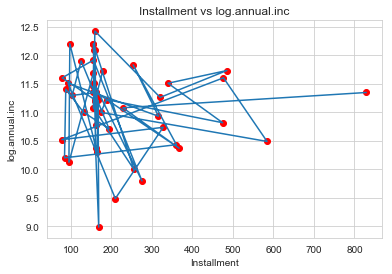

In [10]:
plt.scatter(df['installment'], df['log.annual.inc'], color='red')
plt.plot(df['installment'], df['log.annual.inc'], '-')
plt.xlabel('Installment')
plt.ylabel('log.annual.inc')
plt.title('Installment vs log.annual.inc')

Subplots of 'days.with.cr.line' vs 'log.annual.inc' and 'revol.bal' vs 'log.annual.inc'

Text(232.61818181818177, 0.5, 'log.annual.inc')

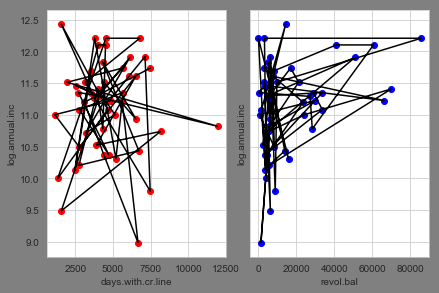

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.patch.set_facecolor('grey')
fig.tight_layout()

ax[0].scatter(df['days.with.cr.line'], df['log.annual.inc'], color='red')
ax[0].plot(df['days.with.cr.line'], df['log.annual.inc'], color='black')
ax[0].set_xlabel('days.with.cr.line')
ax[0].set_ylabel('log.annual.inc')

ax[1].scatter(df['revol.bal'], df['log.annual.inc'], color='blue')
ax[1].plot(df['revol.bal'], df['log.annual.inc'], color='black')
ax[1].set_xlabel('revol.bal')
ax[1].set_ylabel('log.annual.inc')


## Using Seaborn

Correlation heatmap of all the numeric columns

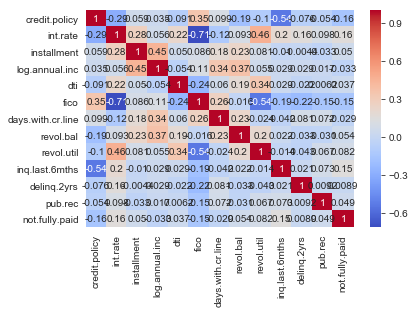

In [12]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

pairplot() of Seaborn displays graphs of every possible combination of columns

C:\Users\Satadru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Satadru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Satadru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Satadru\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


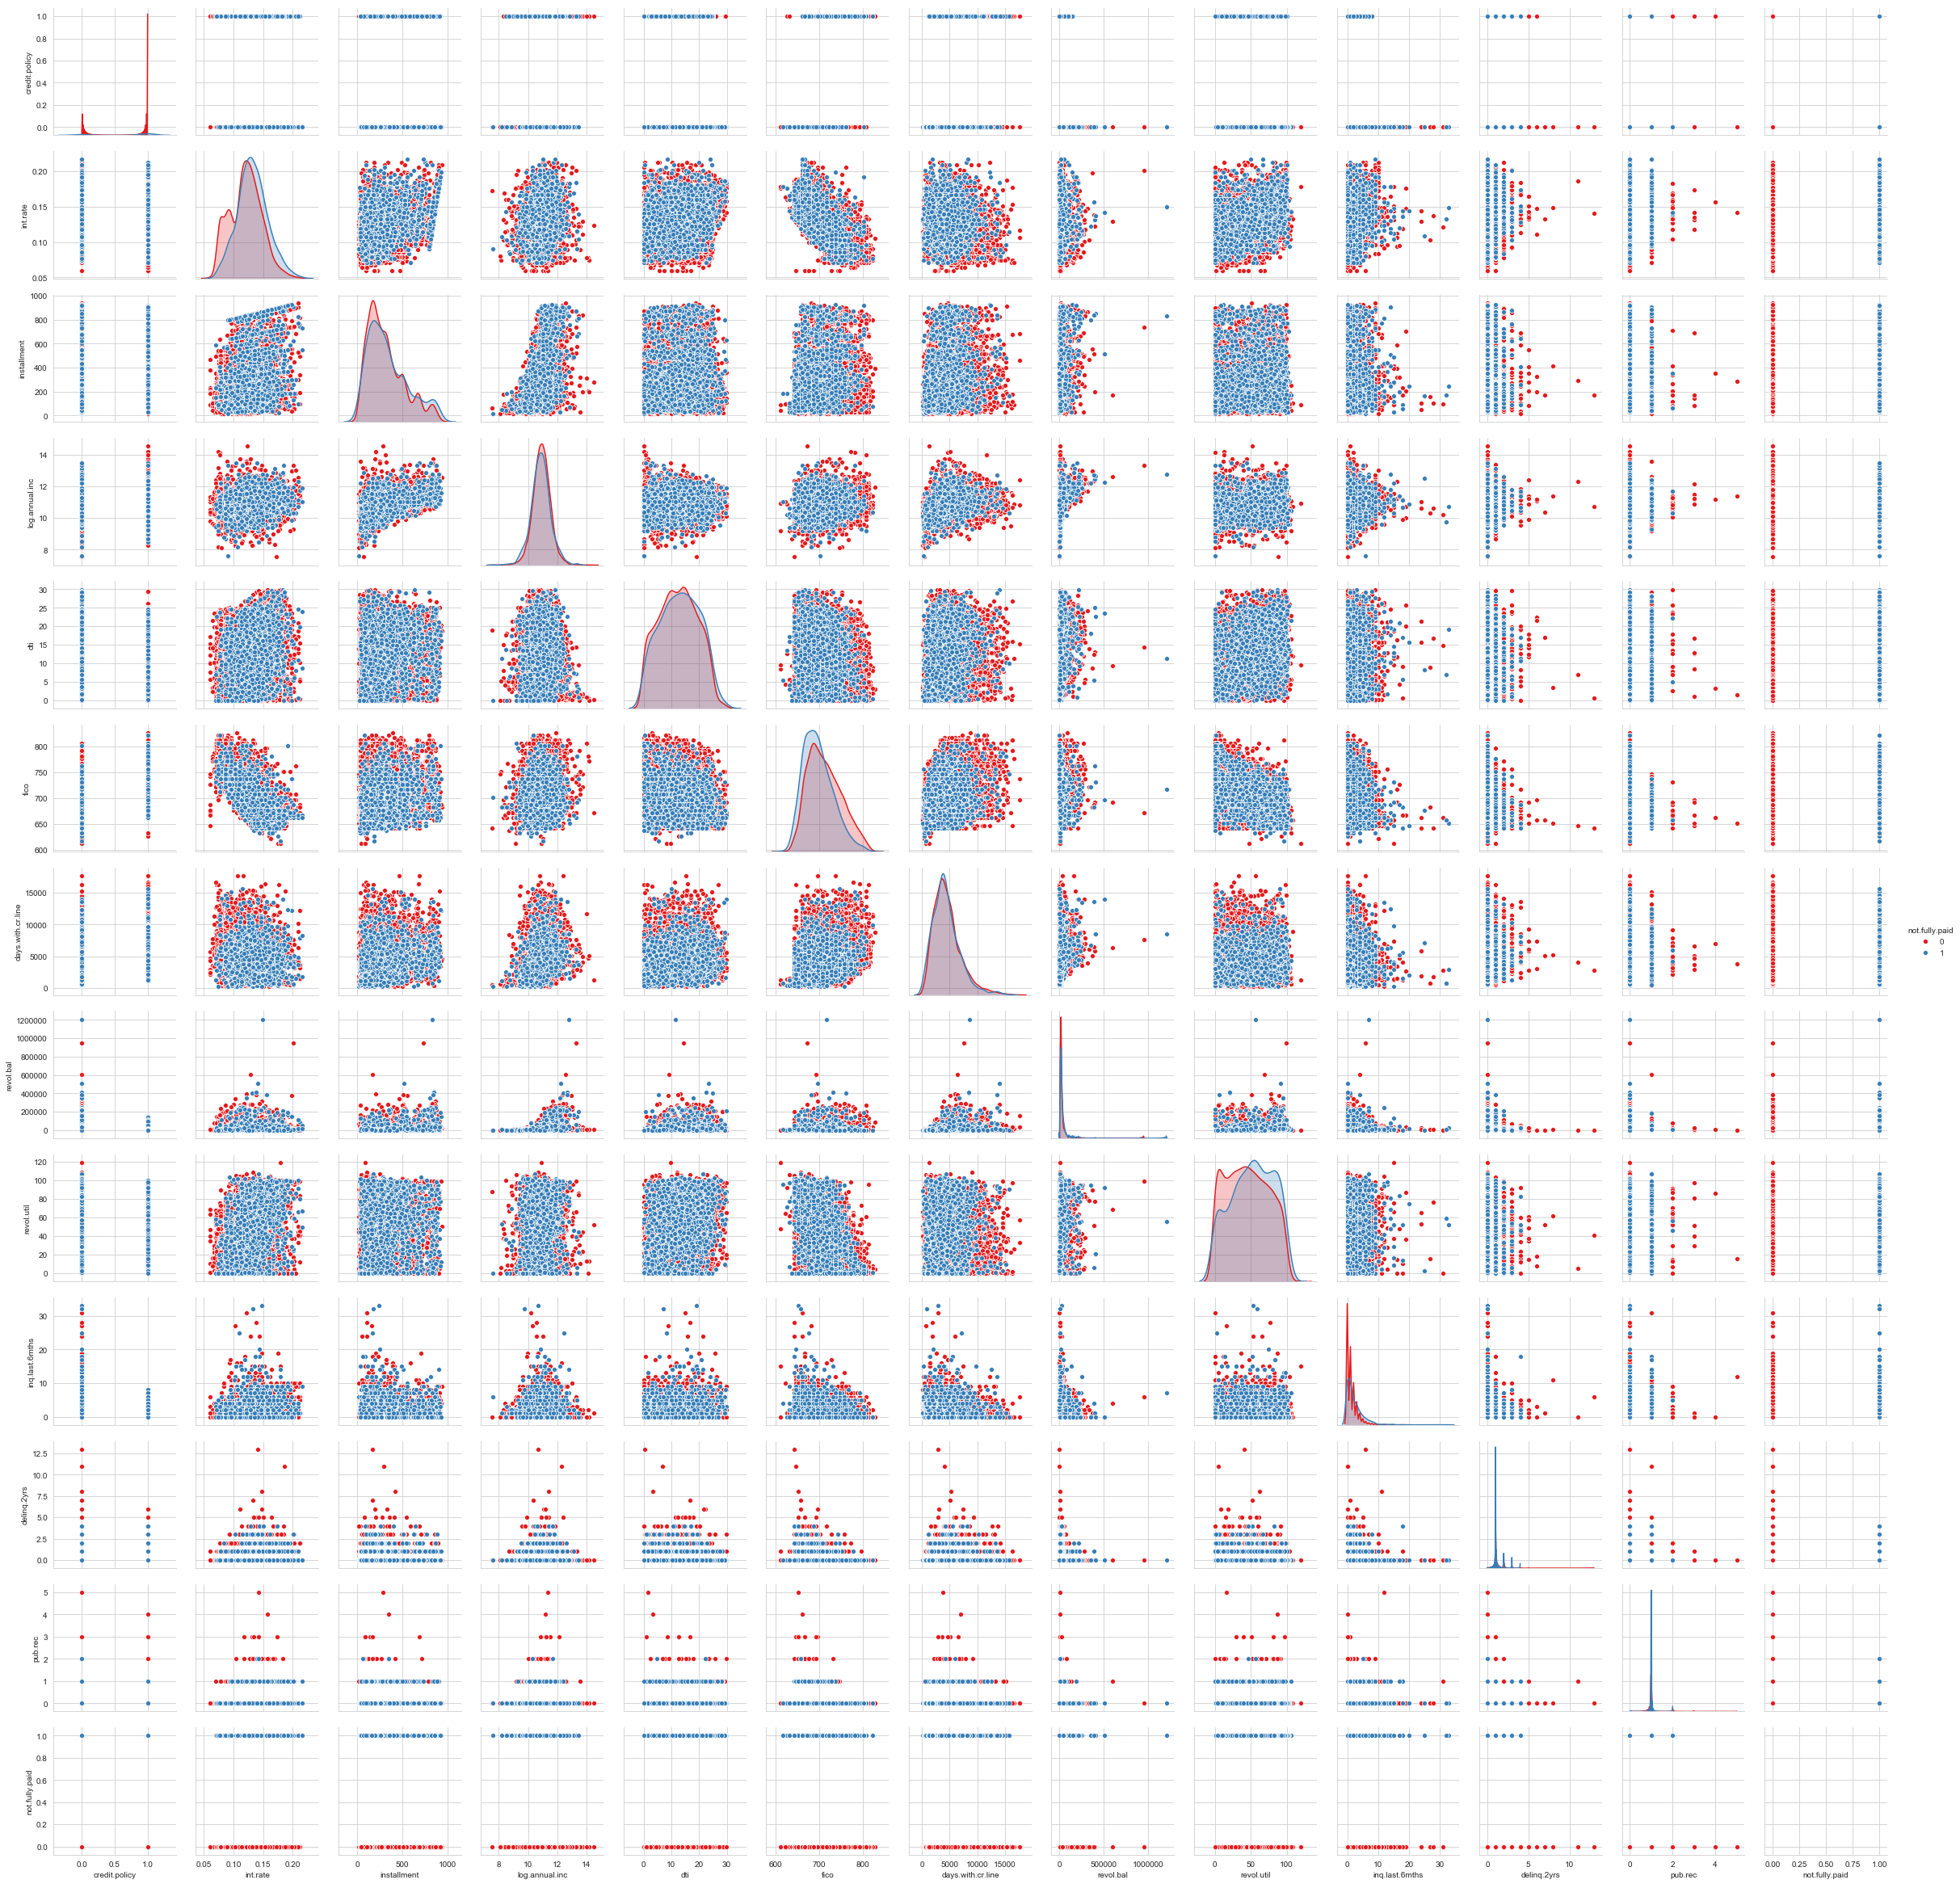

In [9]:
sns.pairplot(data, hue = 'not.fully.paid', palette = 'Set1')

Segregating and counting the entries based on 'purpose' of loan

In [10]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

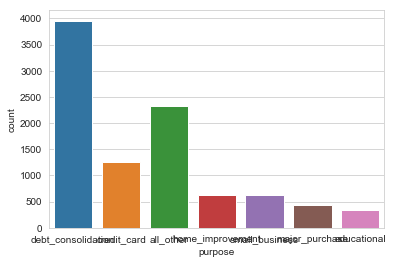

In [11]:
sns.countplot(data['purpose'])

Kernel Density Estimate (KDE) plot of 'installment' vs 'int.rate'

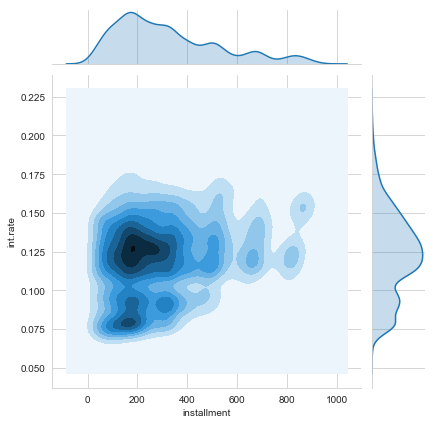

In [12]:
sns.jointplot('installment', 'int.rate', data = data, kind = 'kde')

Linear plot of 'fico' vs 'int.rate', with hue as 'credi.policy' and segregating the plots on the basis of col='not.fully.paid'

C:\Users\Satadru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


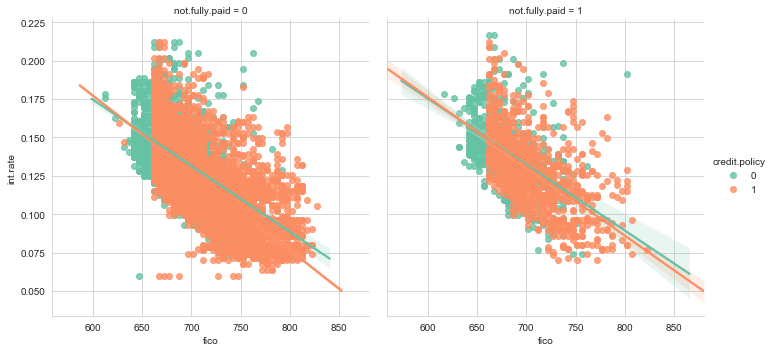

In [13]:
sns.lmplot('fico', 'int.rate', data=data, col='not.fully.paid', hue='credit.policy', palette='Set2')

Violin plot of first 50 datapoints, based on 'fico' vs 'revol.bal' and hue='credit.policy'

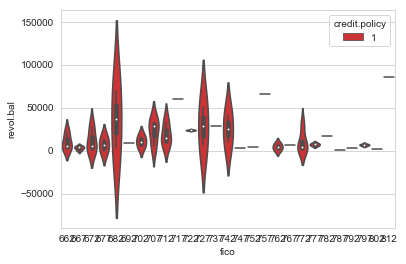

In [24]:
sns.violinplot('fico', 'revol.bal', data=data.head(50), hue='credit.policy', palette='Set1')

Box plot of last 50 datapoints, based on 'fico' vs 'revol.bal' and hue='credit.policy'

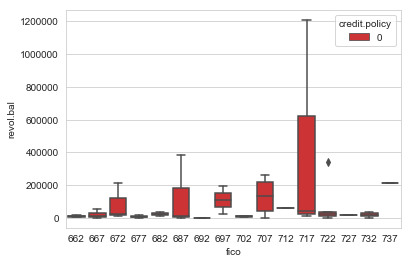

In [20]:
sns.boxplot('fico', 'revol.bal', data=data.tail(50), hue='credit.policy', palette='Set1')

# Using LabelEncoder

In [27]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
X = data.iloc[:, :].values

We will use LabelEncoder() to convert the String values of 'purpose' to integer values

In [17]:
X[:, 1] = LabelEncoder().fit_transform(X[:, 1])

# Linear Regression

Using Linear Regresssion to predict 'days.with.cr.line'

In [18]:
x = X[:, [0,1,2,3,4,5,6,8,9,10,11,12,13]]

In [19]:
y = data['days.with.cr.line']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [22]:
from sklearn import metrics

Let us find the random_state which gives best r2_score

In [98]:
acc = []
for i in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lm.fit(x_train, y_train)
    pred = lm.predict(x_test)
    acc.append(metrics.r2_score(y_test, pred))

In [99]:
max(acc)

0.26579834104329614

In [100]:
acc.index(max(acc))

2

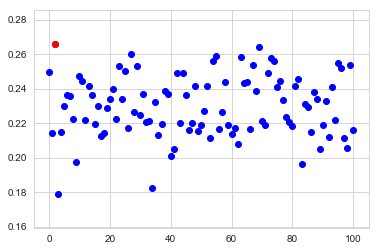

In [101]:
plt.scatter(list(range(101)), acc, color='blue')
plt.scatter(acc.index(max(acc)), max(acc), color='red')

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=acc.index(max(acc)))
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
pred = lm.predict(x_test)

Text(0, 0.5, 'pred')

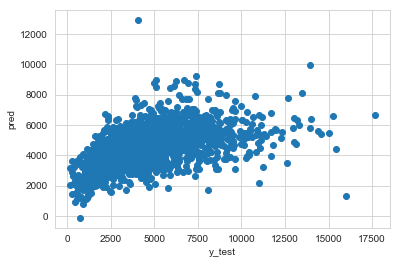

In [104]:
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')

In [105]:
print('MAE : ', metrics.mean_absolute_error(y_test, pred))
print('MSE : ', metrics.mean_squared_error(y_test, pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE :  1551.9501322906747
MSE :  4365542.874511771
RMSE :  2089.388157933267


Based on the accuracy score and error values, we can say that LinearRegression is a bad ML model for this dataset.

This is because of the low correlation and lack of linear relationship in the data, as it is evident from the pairplot() and heatmap on correlation.

# Logistic Regression

Using Logistic Regression to classify 'not.fully.paid'

In [23]:
x2 = X[:, :-1]
y2 = data['not.fully.paid']

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Finding the best random state

In [109]:
acc2 = []
for i in range(101):
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=i)
    lr.fit(x2_train, y2_train)
    pred2 = lr.predict(x2_test)
    acc2.append(metrics.accuracy_score(y2_test, pred2))

C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [110]:
max(acc2)

0.8569937369519833

In [112]:
acc2.index(max(acc2))

96

In [114]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=acc2.index(max(acc2)))
lr.fit(x2_train, y2_train)

C:\Users\Satadru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
pred2 = lr.predict(x2_test)

In [119]:
print(metrics.confusion_matrix(y2_test, pred2))

[[1636    3]
 [ 271    6]]


In [121]:
print(metrics.classification_report(y2_test, pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1639
           1       0.67      0.02      0.04       277

   micro avg       0.86      0.86      0.86      1916
   macro avg       0.76      0.51      0.48      1916
weighted avg       0.83      0.86      0.80      1916



# Decision Trees

Using Decision Trees to classify 'not.fully.paid'

In [27]:
x3 = X[:, :-1]
y3 = data['not.fully.paid']

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [28]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=53)

In [29]:
dtree.fit(x3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
pred3 = dtree.predict(x3_test)

In [31]:
print(metrics.confusion_matrix(y3_test, pred3))

[[1349  267]
 [ 230   70]]


In [32]:
print(metrics.classification_report(y3_test, pred3))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1616
           1       0.21      0.23      0.22       300

   micro avg       0.74      0.74      0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.74      0.75      1916



# Random Forest

Using Random Forest to classify 'not.fully.paid'

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=101)

In [37]:
rfc.fit(x3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
rpred = rfc.predict(x3_test)

In [39]:
print(metrics.confusion_matrix(y3_test, rpred))

[[1605   11]
 [ 296    4]]


In [40]:
print(metrics.classification_report(y3_test, rpred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1616
           1       0.27      0.01      0.03       300

   micro avg       0.84      0.84      0.84      1916
   macro avg       0.56      0.50      0.47      1916
weighted avg       0.75      0.84      0.77      1916

